# MLFlow

## 1 - Subir los archivos a collab: scripts y requirements

Subir los scripts a la carpeta content de collab

## 2 - Instalar las bibliotecas necesarias para ejecutar el código

In [ ]:
#Para no tener problemas en la importaciones aunque Collab automaticamente detecta el directorio contetnt.
import sys
sys.path.append('/content/')

In [ ]:
!pip install -r requirements.txt
import arguments
import create_pipelines
import log_experiment
import objective
import optimize_models
import train_and_evaluate
import text_preprocessing

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.7/648.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.7 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...


## 3 - Analísis de los datos

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))



In [ ]:
df = pd.DataFrame({'text': data.data, 'target': data.target})

In [ ]:
df.head()

,text,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18846 non-null  object
 1   target  18846 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 294.6+ KB


In [ ]:
df.describe()

,target
count,18846.000000
mean,9.293166
std,5.562798
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,19.000000


In [ ]:
for i, target_name in enumerate(data.target_names):
    print(f"{i}: {target_name}")

0: alt.atheism
1: comp.graphics
2: comp.os.ms-windows.misc
3: comp.sys.ibm.pc.hardware
4: comp.sys.mac.hardware
5: comp.windows.x
6: misc.forsale
7: rec.autos
8: rec.motorcycles
9: rec.sport.baseball
10: rec.sport.hockey
11: sci.crypt
12: sci.electronics
13: sci.med
14: sci.space
15: soc.religion.christian
16: talk.politics.guns
17: talk.politics.mideast
18: talk.politics.misc
19: talk.religion.misc


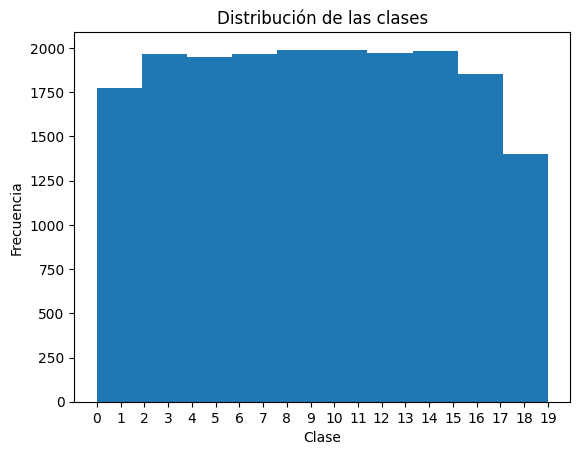

In [ ]:
plt.hist(df['target'])
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Distribución de las clases')
plt.xticks(range(20))
plt.show()

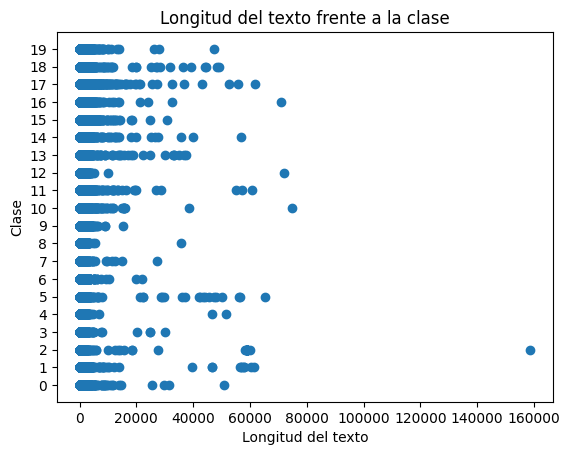

In [ ]:
plt.scatter(df['text'].str.len(), df['target'])
plt.xlabel('Longitud del texto')
plt.ylabel('Clase')
plt.title('Longitud del texto frente a la clase')
plt.yticks(range(20))
plt.show()

## 4 - Iniciar el programa. Le pasamos como argumento el nombre del experimento y el n-trials

In [ ]:
#Setear nombre de Experimento y n_trials para la optimización con Optuna
!python main.py --experiment_name "Experimento_1" --n_trials 2

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
📌 Experimento: Experimento_1 | N-Trials: 2
🔎 Preprocesando texto... 📖
Preprocesando train: 100% 15076/15076 [00:39<00:00, 378.12it/s]
Preprocesando val: 100% 3770/3770 [00:08<00:00, 459.19it/s]
[I 2025-02-20 20:43:41,852] A new study created in memory with name: no-name-5636184f-875a-41c0-b5bd-42945d11e048

🚀 Entrenando NaiveBayes...

✅ Modelo NaiveBayes evaluado con Accuracy: 0.770026525198939
[I 2025-02-20 20:43:52,400] Trial 0 finished with value: 0.770026525198939 and parameters: {'max_df': 0.8490043703344643, 'min_df': 1, 'tfidf_ngram_range': 2, 'alpha': 0.01327687139750877}. Best is trial 0 with value: 0.770026525198939.

🚀 Entrenando NaiveBayes...

✅ Modelo NaiveBayes evaluado con Accuracy: 0.753315649867374
[I 2025-02-20 20:44:05,728] Trial 1 finished with value: 0.753315649867374 and parameters: {'max_df': 0.5652327996302678, 'min_df': 1, 'tfidf_ngram_range': 2, '

 Si se desea se puede hacer un control de los logs para que no aparezcan excepto warning y errors. Eso lo dejo a convenio del usuario final.

## 5 - Ejecutar MLflow en segundo plano

In [ ]:
!nohup mlflow ui --port 5000 --host 0.0.0.0 &

nohup: appending output to 'nohup.out'


## 6 - Generar tunel a través del puerto 5000 para obtener enlacepúblico para la UI de MLflow

In [ ]:
from pyngrok import ngrok, conf
#Autenticar con token
ngrok.set_auth_token("++++++++++++++++++") #Token
# Obtener la configuración por defecto
config = conf.get_default()
# Modificar la configuración
config.tunnels = [{
    "proto": "http",
    "addr": 5000,
    "name": "mlflow-tunnel"
}]
# Configurar pyngrok con la nueva configuración
conf.set_default(config)
# Conectar a ngrok
mlflow_url = ngrok.connect(5000)
print(f"📢 Accede a la UI de MLflow aquí: {mlflow_url.public_url}")

📢 Accede a la UI de MLflow aquí: https://996b-35-204-236-120.ngrok-free.app


- UI MLFlow para: Experimento_1 n_trials = 2

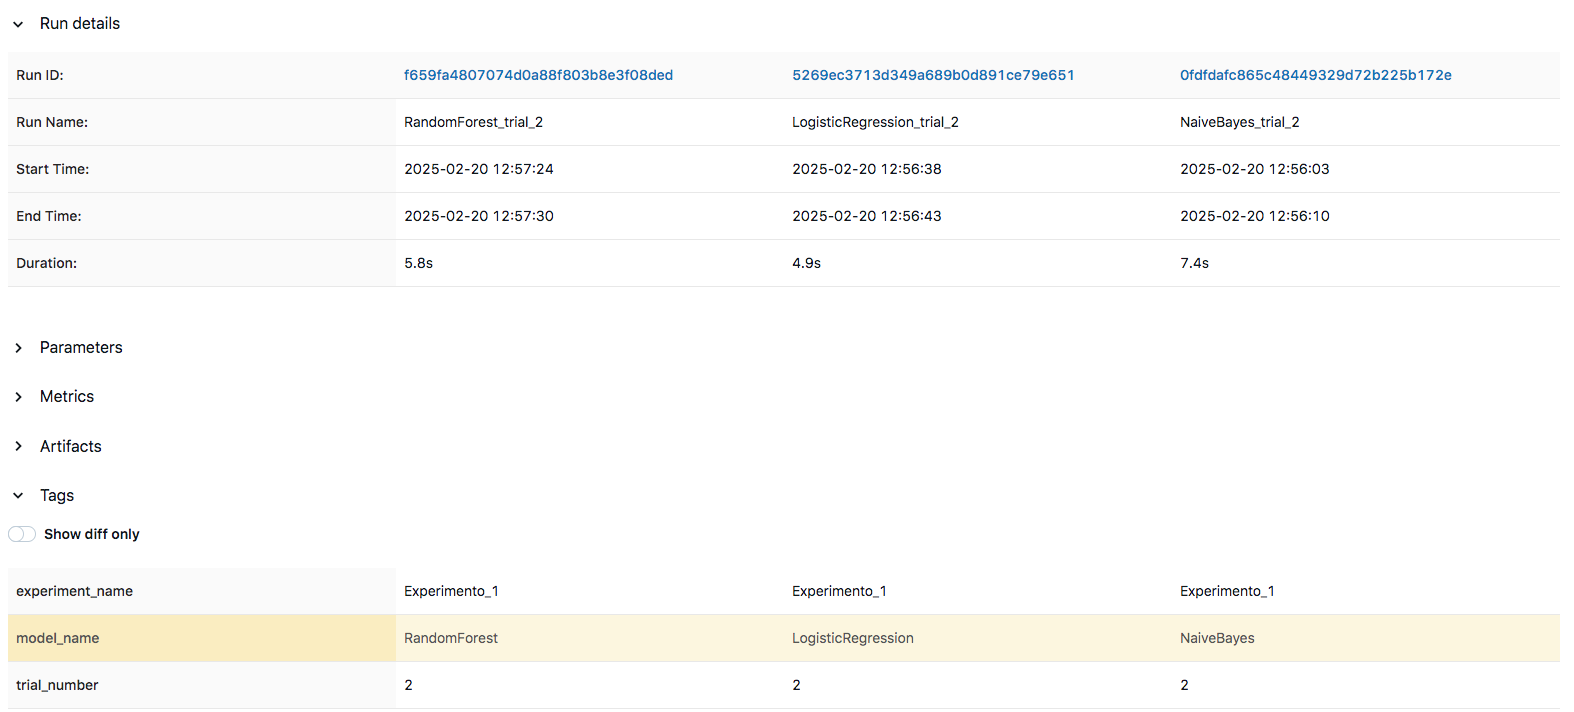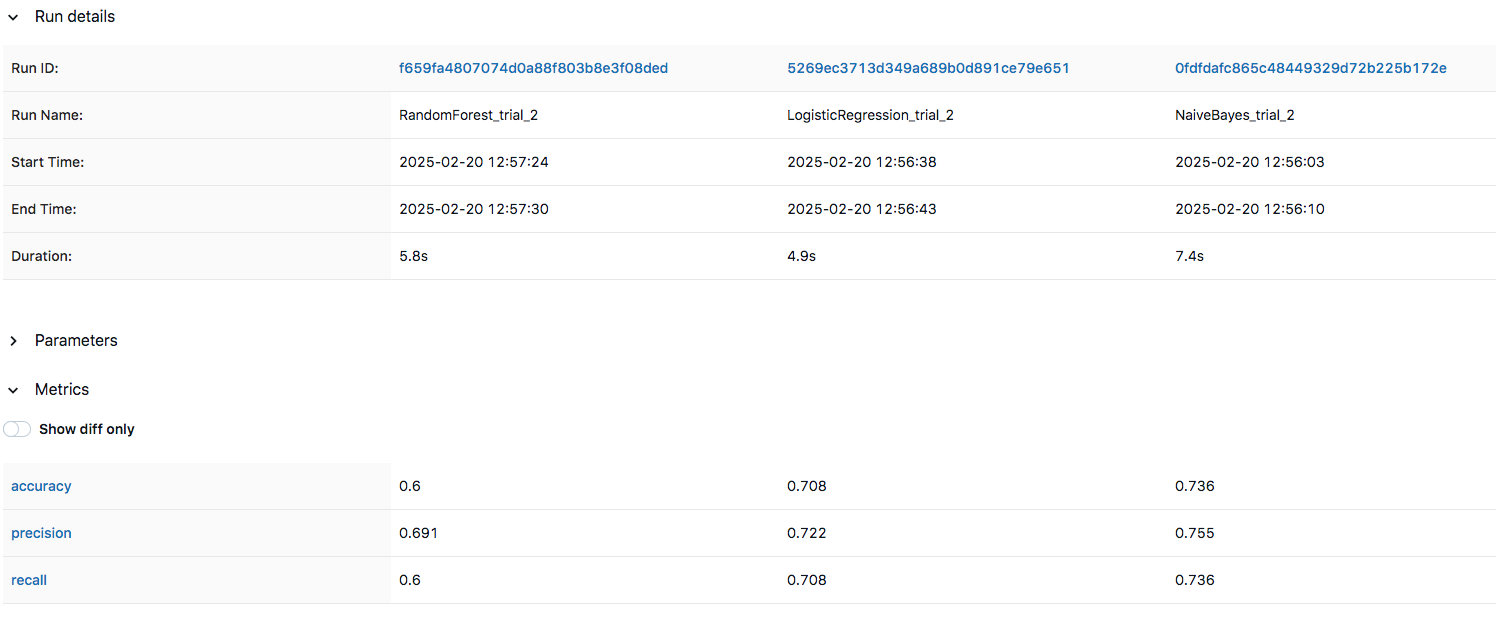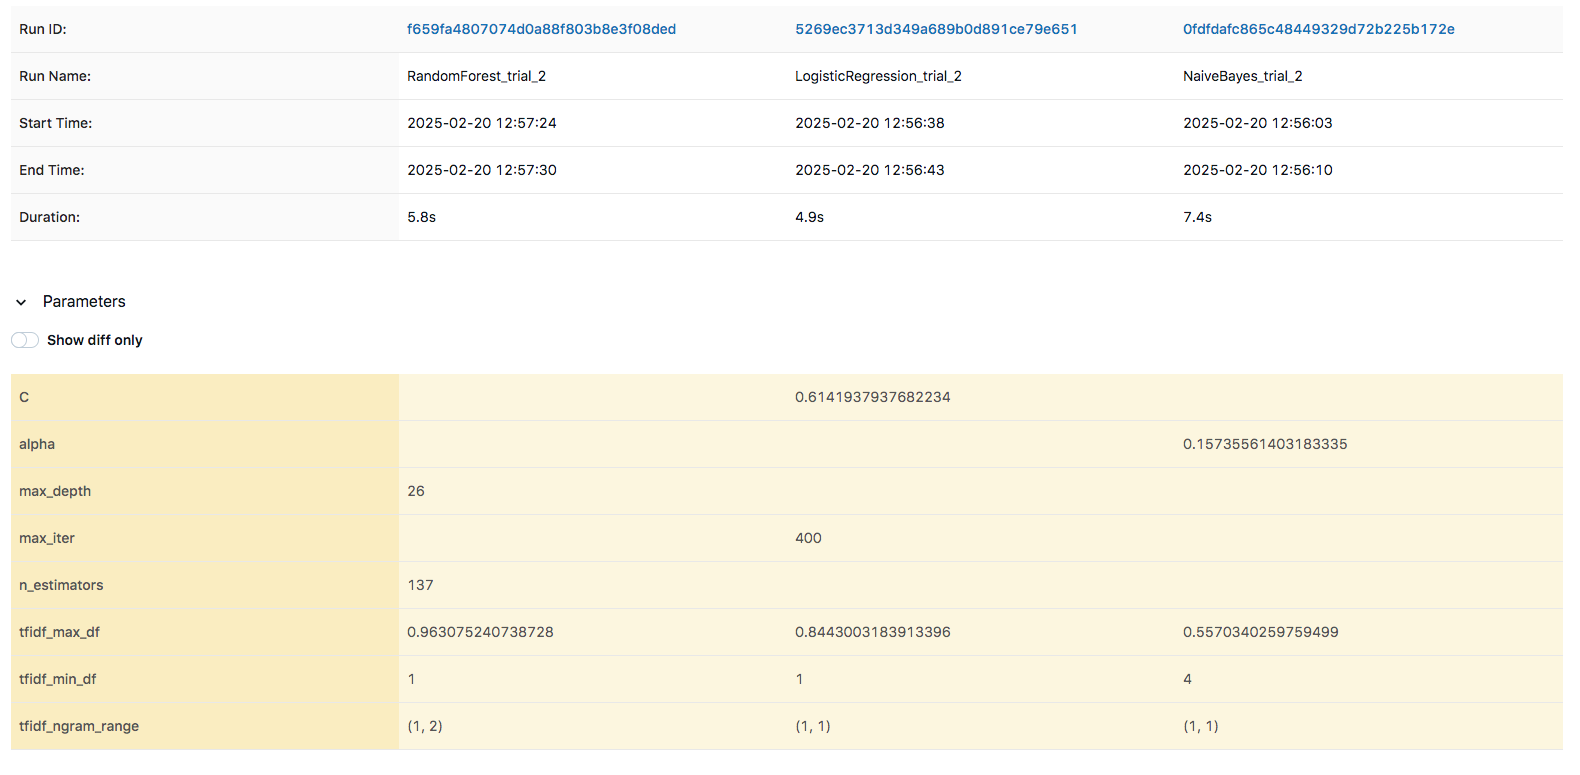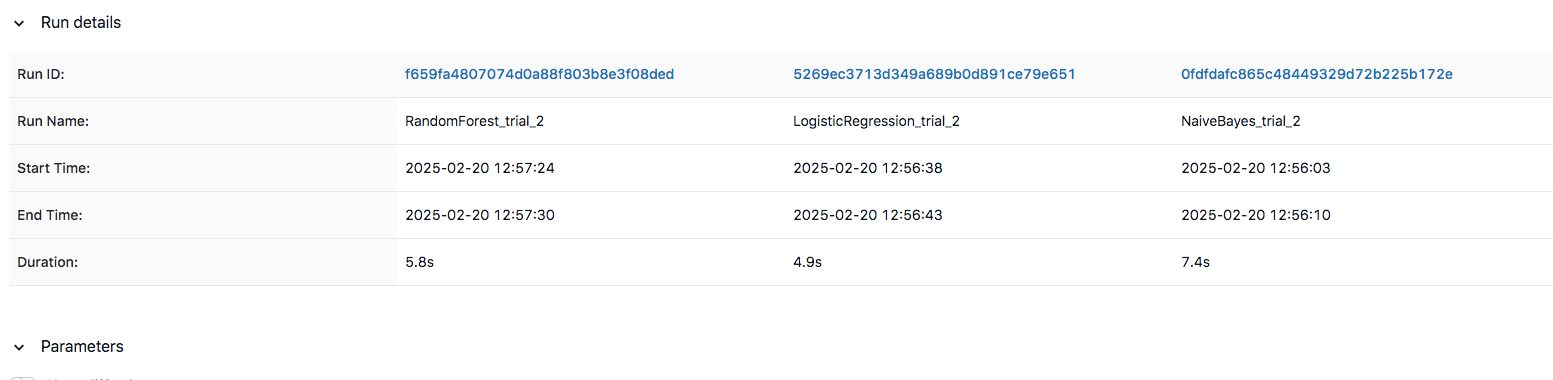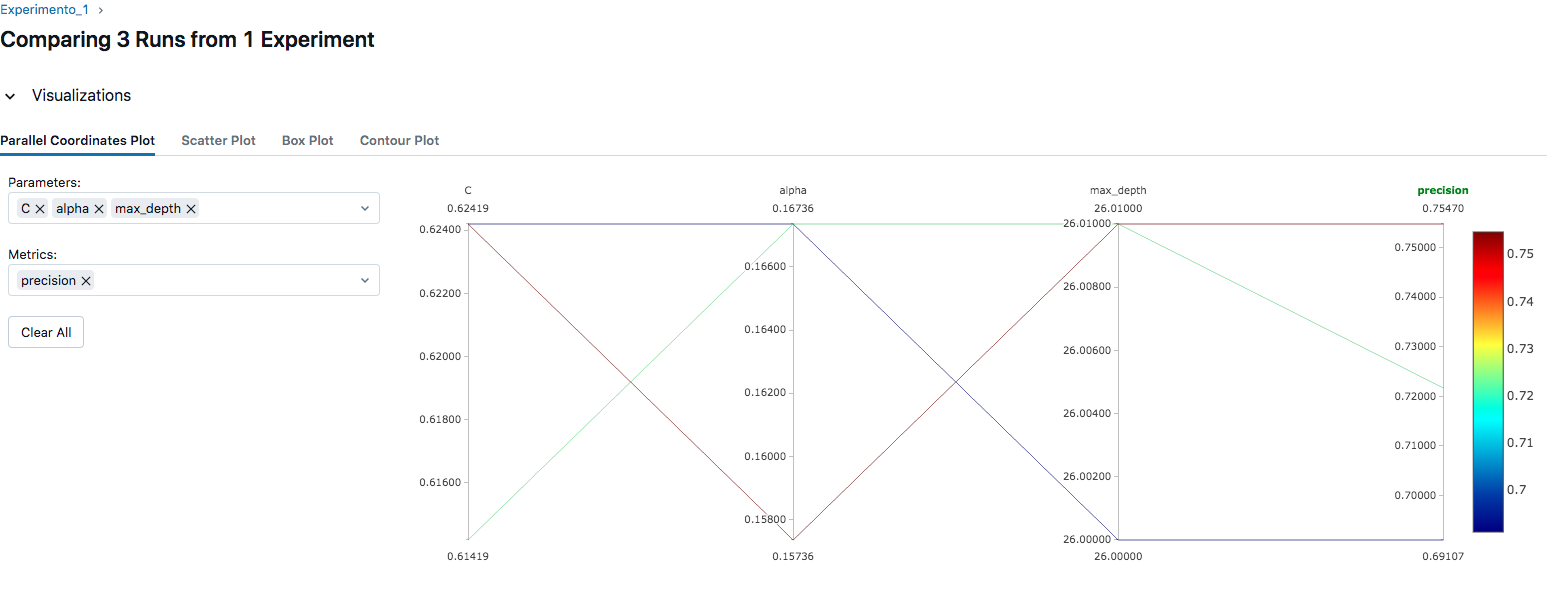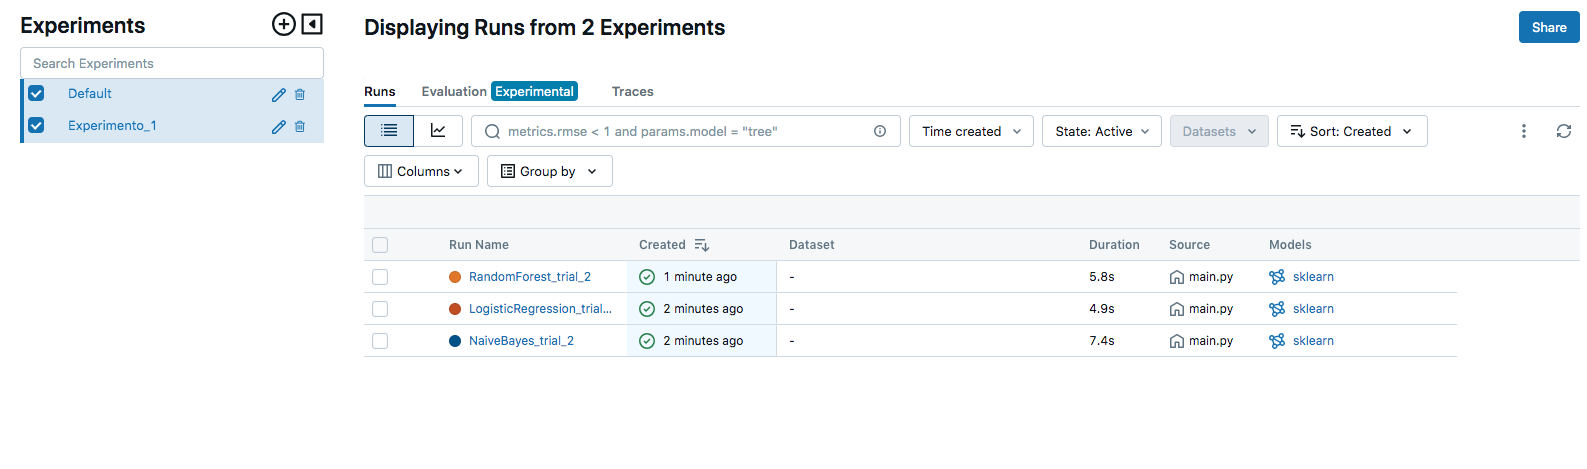